In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

df = pd.read_csv('data_cleaned.csv')
df_orders = pd.read_csv('orders_aggregated.csv')

date_cols = ['order_purchase_timestamp', 'order_delivered_customer_date', 
             'order_estimated_delivery_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])
    if col in df_orders.columns:
        df_orders[col] = pd.to_datetime(df_orders[col])

df['order_month'] = pd.to_datetime(df['order_month'].astype(str))
df_orders['order_month'] = pd.to_datetime(df_orders['order_month'].astype(str))

print(f"Dataset carregado: {len(df):,} registros (itens)")
print(f"Pedidos únicos: {len(df_orders):,}")
print()


Dataset carregado: 112,640 registros (itens)
Pedidos únicos: 98,658



Análise descritiva - medidas de tendência central e dispersão

In [2]:
numeric_vars = ['total', 'subtotal', 'freight', 'payment_value', 
                'delivery_lead_time', 'delivery_delay_days', 'freight_share']

desc_stats = df_orders[['total', 'subtotal', 'freight', 'payment_value', 
                         'delivery_lead_time', 'delivery_delay_days']].describe()
print("\nEstatísticas Descritivas (por pedido):")
print(desc_stats.round(2))
print()


print("\nMedidas Adicionais:")
for var in ['total', 'delivery_lead_time', 'freight']:
    if var in df_orders.columns:
        data = df_orders[var].dropna()
        print(f"\n{var.upper()}:")
        print(f"  Média: {data.mean():.2f}")
        print(f"  Mediana: {data.median():.2f}")
        print(f"  Desvio Padrão: {data.std():.2f}")
        print(f"  Coef. Variação: {(data.std()/data.mean()*100):.2f}%")
        print(f"  Assimetria: {stats.skew(data):.2f}")
        print(f"  Curtose: {stats.kurtosis(data):.2f}")

print()


Estatísticas Descritivas (por pedido):
          total  subtotal   freight  payment_value  delivery_lead_time  \
count  98658.00  98658.00  98658.00       98657.00            96476.00   
mean     160.57    137.74     22.82         160.60               12.09   
std      220.45    210.63     21.65         220.47                9.55   
min        9.59      0.85      0.00           9.59                0.00   
25%       61.98     45.90     13.85          62.00                6.00   
50%      105.29     86.90     17.17         105.29               10.00   
75%      176.86    149.90     24.04         176.87               15.00   
max    13664.08  13440.00   1794.96       13664.08              209.00   

       delivery_delay_days  
count             96476.00  
mean                -11.88  
std                  10.18  
min                -147.00  
25%                 -17.00  
50%                 -12.00  
75%                  -7.00  
max                 188.00  


Medidas Adicionais:

TOTAL:
  

Visualizações - distribuições

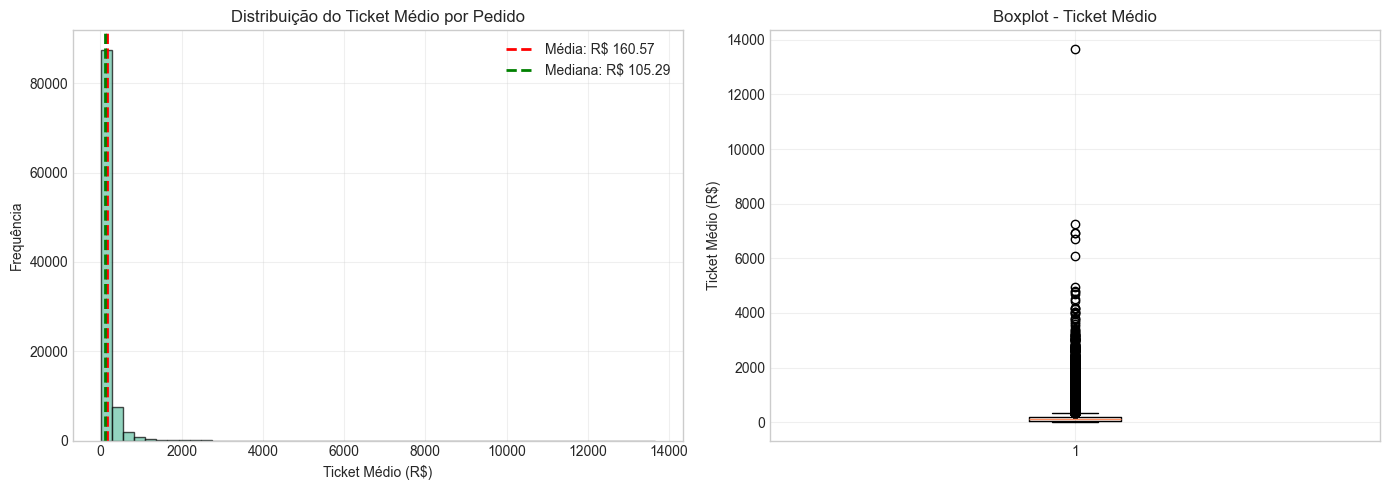

✓ Salvo: eda_01_ticket_distribution.png


In [3]:
# Distribuição do Ticket Médio (Total por pedido)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].hist(df_orders['total'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df_orders['total'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Média: R$ {df_orders["total"].mean():.2f}')
axes[0].axvline(df_orders['total'].median(), color='green', linestyle='--', 
                linewidth=2, label=f'Mediana: R$ {df_orders["total"].median():.2f}')
axes[0].set_xlabel('Ticket Médio (R$)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição do Ticket Médio por Pedido')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


axes[1].boxplot(df_orders['total'].dropna(), vert=True)
axes[1].set_ylabel('Ticket Médio (R$)')
axes[1].set_title('Boxplot - Ticket Médio')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.savefig('./outputs/02_eda_output/eda_01_ticket_distribution.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Salvo: eda_01_ticket_distribution.png")



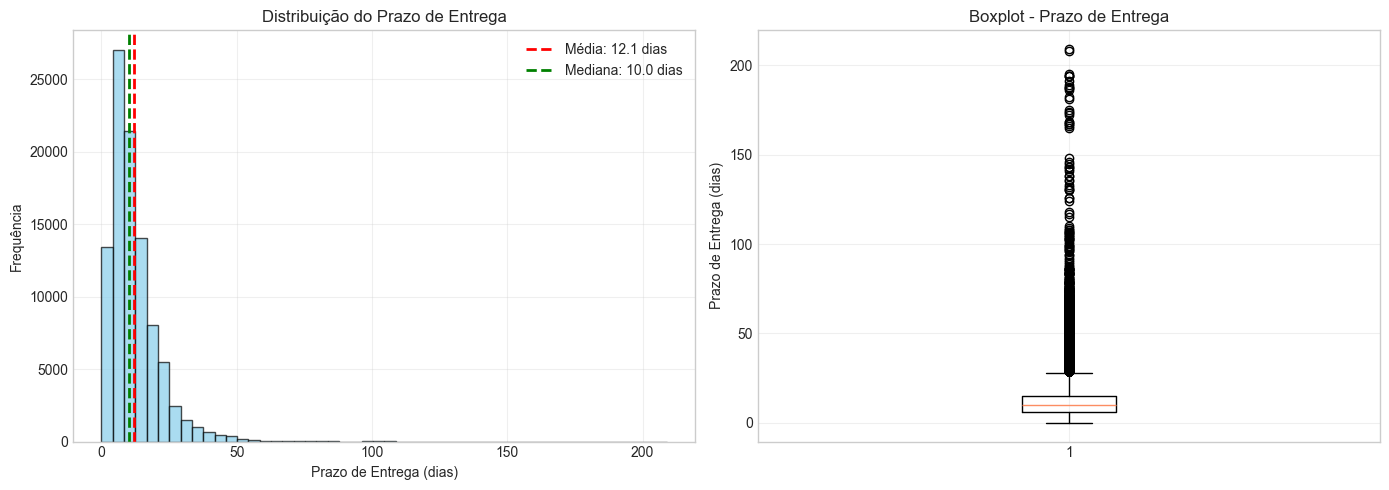

✓ Salvo: eda_02_delivery_time_distribution.png


In [4]:
# Distribuição do Prazo de Entrega
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

delivery_data = df_orders['delivery_lead_time'].dropna()
delivery_data = delivery_data[delivery_data >= 0] 

axes[0].hist(delivery_data, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(delivery_data.mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Média: {delivery_data.mean():.1f} dias')
axes[0].axvline(delivery_data.median(), color='green', linestyle='--', 
                linewidth=2, label=f'Mediana: {delivery_data.median():.1f} dias')
axes[0].set_xlabel('Prazo de Entrega (dias)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição do Prazo de Entrega')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(delivery_data, vert=True)
axes[1].set_ylabel('Prazo de Entrega (dias)')
axes[1].set_title('Boxplot - Prazo de Entrega')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.savefig('./outputs/02_eda_output/eda_02_delivery_time_distribution.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Salvo: eda_02_delivery_time_distribution.png")

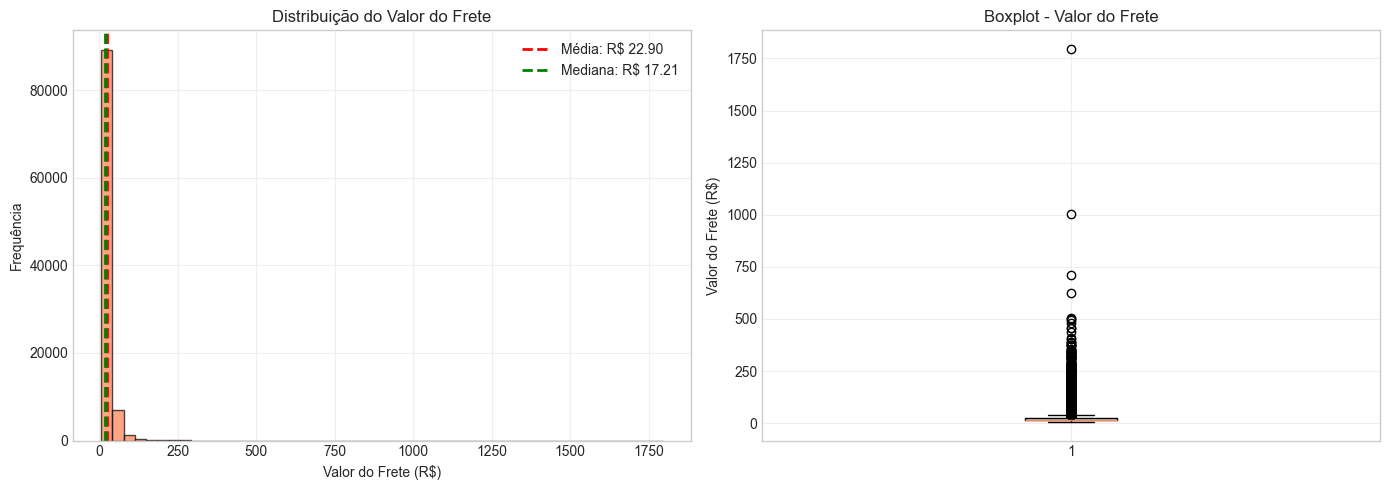

✓ Salvo: eda_03_freight_distribution.png


In [5]:
# Distribuição do Frete
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

freight_data = df_orders['freight'].dropna()
freight_data = freight_data[freight_data > 0]

axes[0].hist(freight_data, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0].axvline(freight_data.mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Média: R$ {freight_data.mean():.2f}')
axes[0].axvline(freight_data.median(), color='green', linestyle='--', 
                linewidth=2, label=f'Mediana: R$ {freight_data.median():.2f}')
axes[0].set_xlabel('Valor do Frete (R$)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição do Valor do Frete')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


axes[1].boxplot(freight_data, vert=True)
axes[1].set_ylabel('Valor do Frete (R$)')
axes[1].set_title('Boxplot - Valor do Frete')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.savefig('./outputs/02_eda_output/eda_03_freight_distribution.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Salvo: eda_03_freight_distribution.png")

Análise de correlação


Matriz de Correlação:
                      total  subtotal  freight  payment_value  \
total                 1.000     0.996    0.491          1.000   
subtotal              0.996     1.000    0.411          0.996   
freight               0.491     0.411    1.000          0.491   
payment_value         1.000     0.996    0.491          1.000   
delivery_lead_time    0.069     0.055    0.167          0.069   
delivery_delay_days  -0.018    -0.013   -0.049         -0.018   
payment_installments  0.320     0.314    0.199          0.320   

                      delivery_lead_time  delivery_delay_days  \
total                              0.069               -0.018   
subtotal                           0.055               -0.013   
freight                            0.167               -0.049   
payment_value                      0.069               -0.018   
delivery_lead_time                 1.000                0.608   
delivery_delay_days                0.608                1.000   
p

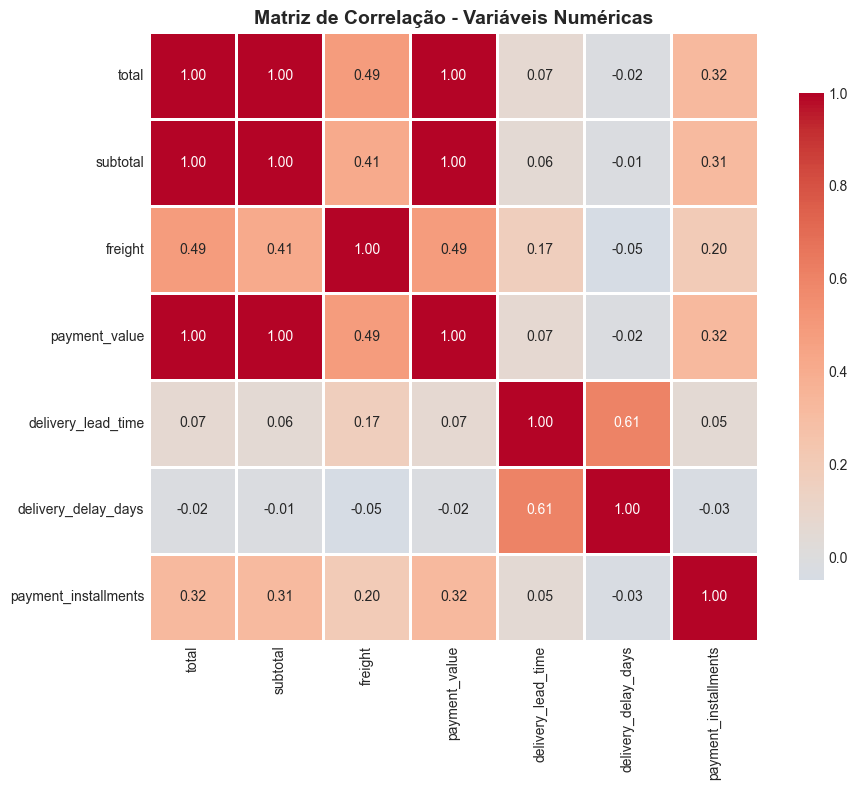

✓ Salvo: eda_04_correlation_matrix.png


In [6]:

corr_vars = ['total', 'subtotal', 'freight', 'payment_value', 
             'delivery_lead_time', 'delivery_delay_days', 'payment_installments']
corr_data = df_orders[corr_vars].dropna()


corr_matrix = corr_data.corr()
print("\nMatriz de Correlação:")
print(corr_matrix.round(3))


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
plt.savefig('./outputs/02_eda_output/eda_04_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Salvo: eda_04_correlation_matrix.png")

Análise Temporal

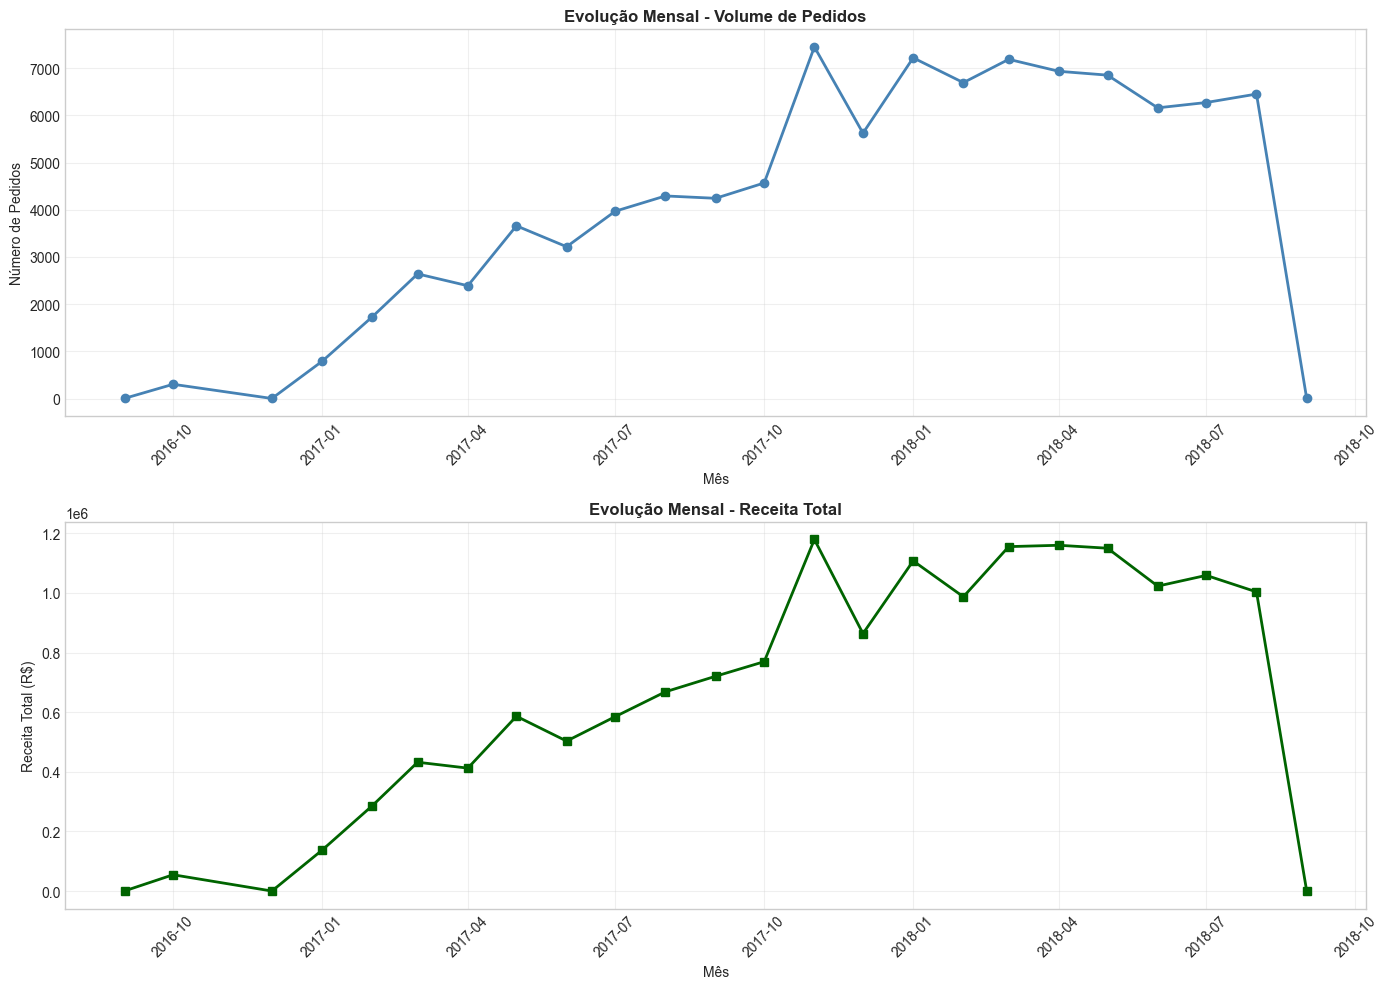

✓ Salvo: eda_05_monthly_trends.png


In [7]:

monthly_orders = df_orders.groupby('order_month').agg({
    'order_id': 'count',
    'total': 'sum'
}).reset_index()
monthly_orders.columns = ['month', 'n_orders', 'revenue']

fig, axes = plt.subplots(2, 1, figsize=(14, 10))


axes[0].plot(monthly_orders['month'], monthly_orders['n_orders'], 
             marker='o', linewidth=2, markersize=6, color='steelblue')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Número de Pedidos')
axes[0].set_title('Evolução Mensal - Volume de Pedidos', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)


axes[1].plot(monthly_orders['month'], monthly_orders['revenue'], 
             marker='s', linewidth=2, markersize=6, color='darkgreen')
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Receita Total (R$)')
axes[1].set_title('Evolução Mensal - Receita Total', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
plt.savefig('./outputs/02_eda_output/eda_05_monthly_trends.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Salvo: eda_05_monthly_trends.png")

Análise por categoria

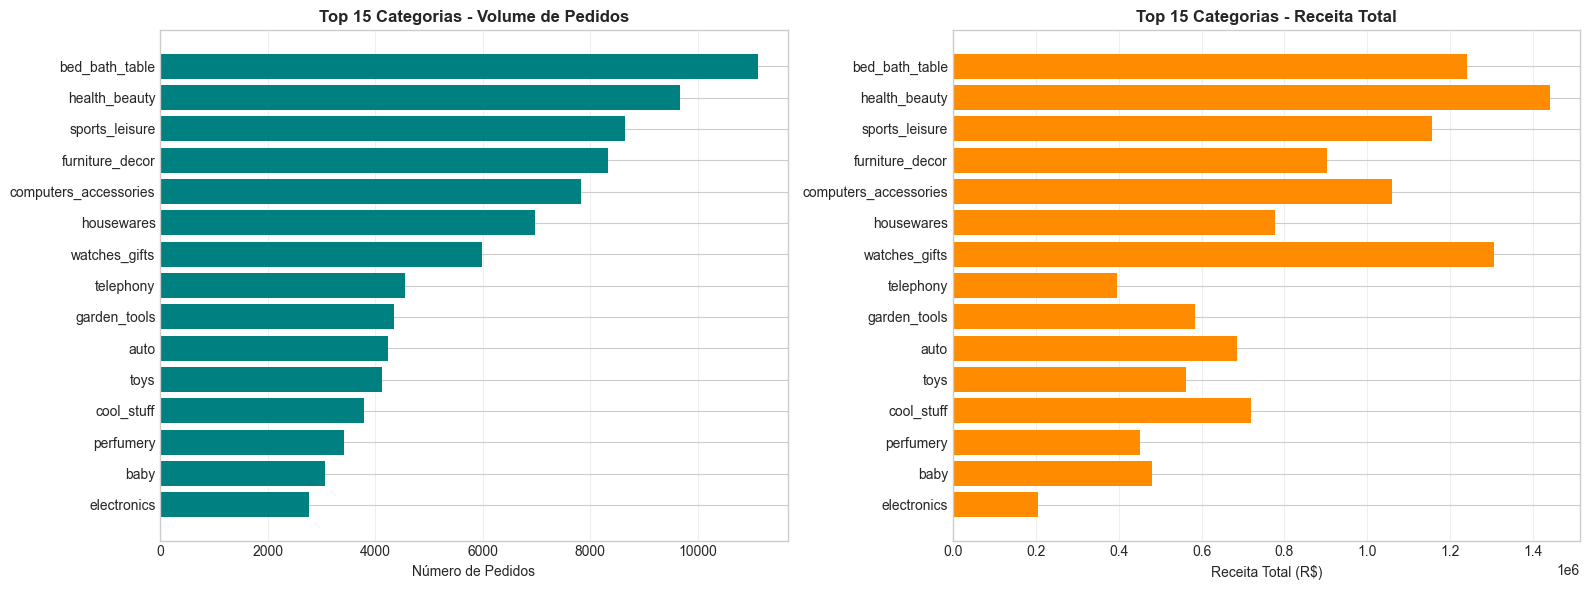

✓ Salvo: eda_06_top_categories.png


In [9]:
top_categories = df.groupby('product_category_name_english').agg({
    'order_id': 'count',
    'total': 'sum'
}).reset_index()
top_categories.columns = ['category', 'n_orders', 'revenue']
top_categories = top_categories.sort_values('n_orders', ascending=False).head(15)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Volume
axes[0].barh(top_categories['category'], top_categories['n_orders'], color='teal')
axes[0].set_xlabel('Número de Pedidos')
axes[0].set_title('Top 15 Categorias - Volume de Pedidos', fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Receita
axes[1].barh(top_categories['category'], top_categories['revenue'], color='darkorange')
axes[1].set_xlabel('Receita Total (R$)')
axes[1].set_title('Top 15 Categorias - Receita Total', fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()
plt.savefig('./outputs/02_eda_output/eda_06_top_categories.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Salvo: eda_06_top_categories.png")

Análise Geográfica

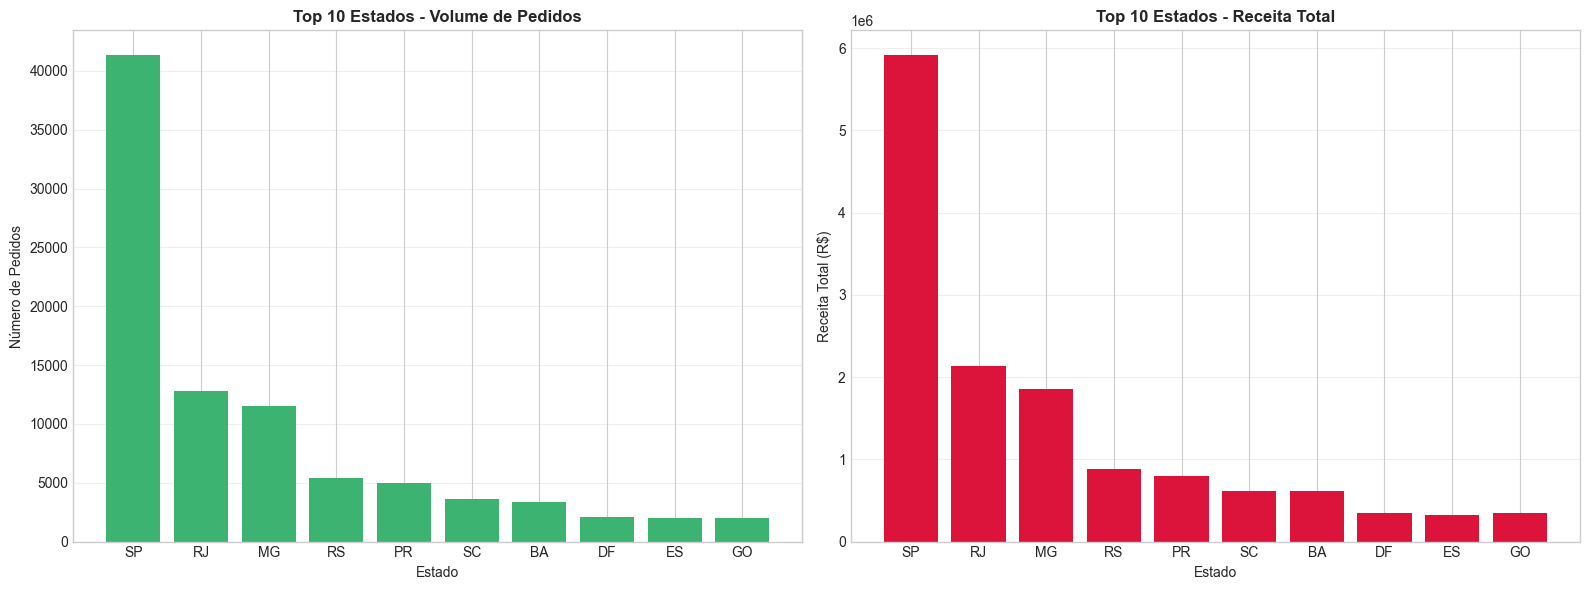

✓ Salvo: eda_07_top_states.png

Análise por Região:
      region  n_orders     revenue  avg_ticket
     Sudeste     67699 10230212.68  151.113202
         Sul     14041  2296705.05  163.571330
    Nordeste      9336  1880799.54  201.456677
Centro-Oeste      5744  1023062.00  178.109680
       Norte      1838   410392.40  223.282046


In [10]:
state_analysis = df_orders.groupby('customer_state').agg({
    'order_id': 'count',
    'total': 'sum'
}).reset_index()
state_analysis.columns = ['state', 'n_orders', 'revenue']
state_analysis = state_analysis.sort_values('n_orders', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(state_analysis['state'], state_analysis['n_orders'], color='mediumseagreen')
axes[0].set_xlabel('Estado')
axes[0].set_ylabel('Número de Pedidos')
axes[0].set_title('Top 10 Estados - Volume de Pedidos', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(state_analysis['state'], state_analysis['revenue'], color='crimson')
axes[1].set_xlabel('Estado')
axes[1].set_ylabel('Receita Total (R$)')
axes[1].set_title('Top 10 Estados - Receita Total', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
plt.savefig('./outputs/02_eda_output/eda_07_top_states.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Salvo: eda_07_top_states.png")


# Análise por região
region_analysis = df_orders.groupby('customer_region').agg({
    'order_id': 'count',
    'total': ['sum', 'mean']
}).reset_index()
region_analysis.columns = ['region', 'n_orders', 'revenue', 'avg_ticket']
region_analysis = region_analysis.sort_values('n_orders', ascending=False)

print("\nAnálise por Região:")
print(region_analysis.to_string(index=False))

Análise de pagamento


Distribuição por Tipo de Pagamento:
payment_type  n_orders     revenue  pct_orders
      boleto     19614  2842240.29   19.881002
 credit_card     75615 12567041.97   76.644333
  debit_card      1520   215107.72    1.540691
     voucher      1908   216638.23    1.933973


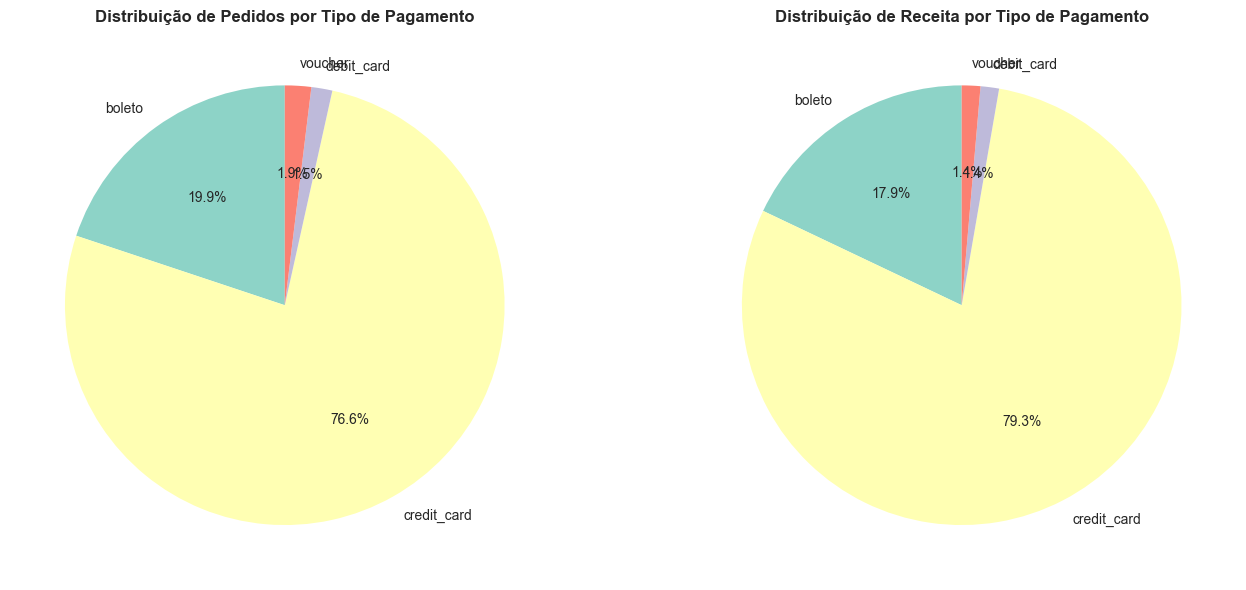

✓ Salvo: eda_08_payment_types.png


In [11]:
payment_analysis = df_orders.groupby('payment_type').agg({
    'order_id': 'count',
    'total': 'sum'
}).reset_index()
payment_analysis.columns = ['payment_type', 'n_orders', 'revenue']
payment_analysis['pct_orders'] = (payment_analysis['n_orders'] / 
                                   payment_analysis['n_orders'].sum() * 100)

print("\nDistribuição por Tipo de Pagamento:")
print(payment_analysis.to_string(index=False))

# Gráfico de pizza
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(payment_analysis['n_orders'], labels=payment_analysis['payment_type'], 
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
axes[0].set_title('Distribuição de Pedidos por Tipo de Pagamento', fontweight='bold')

axes[1].pie(payment_analysis['revenue'], labels=payment_analysis['payment_type'], 
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
axes[1].set_title('Distribuição de Receita por Tipo de Pagamento', fontweight='bold')

plt.tight_layout()
plt.show()
plt.savefig('./outputs/02_eda_output/eda_08_payment_types.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Salvo: eda_08_payment_types.png")

Análise de status de pedidos


Distribuição por Status:
    status  n_orders       pct
  canceled       461  0.467271
 delivered     96478 97.790346
  invoiced       312  0.316244
processing       301  0.305094
   shipped      1106  1.121044


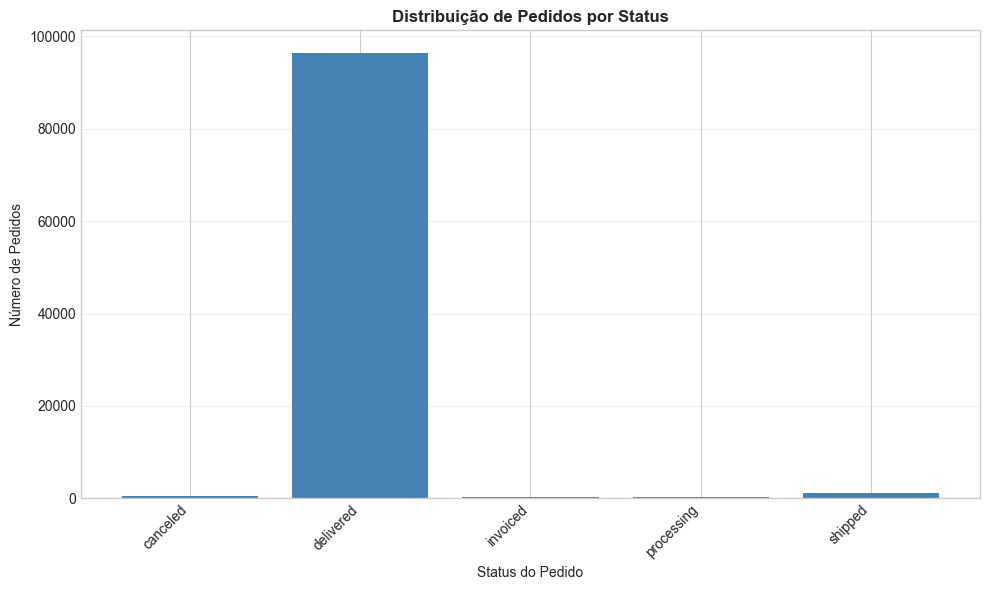

✓ Salvo: eda_09_order_status.png


In [12]:
status_analysis = df_orders.groupby('order_status').agg({
    'order_id': 'count'
}).reset_index()
status_analysis.columns = ['status', 'n_orders']
status_analysis['pct'] = (status_analysis['n_orders'] / 
                          status_analysis['n_orders'].sum() * 100)

print("\nDistribuição por Status:")
print(status_analysis.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.bar(status_analysis['status'], status_analysis['n_orders'], color='steelblue')
plt.xlabel('Status do Pedido')
plt.ylabel('Número de Pedidos')
plt.title('Distribuição de Pedidos por Status', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
plt.savefig('./outputs/02_eda_output/eda_09_order_status.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Salvo: eda_09_order_status.png")

Análise de atraso na entrega


Pedidos no prazo: 89,944 (93.23%)
Pedidos atrasados: 6,534 (6.77%)

Atraso médio (quando atrasado): 10.62 dias
Atraso mediano: 7.00 dias
Atraso máximo: 188.00 dias


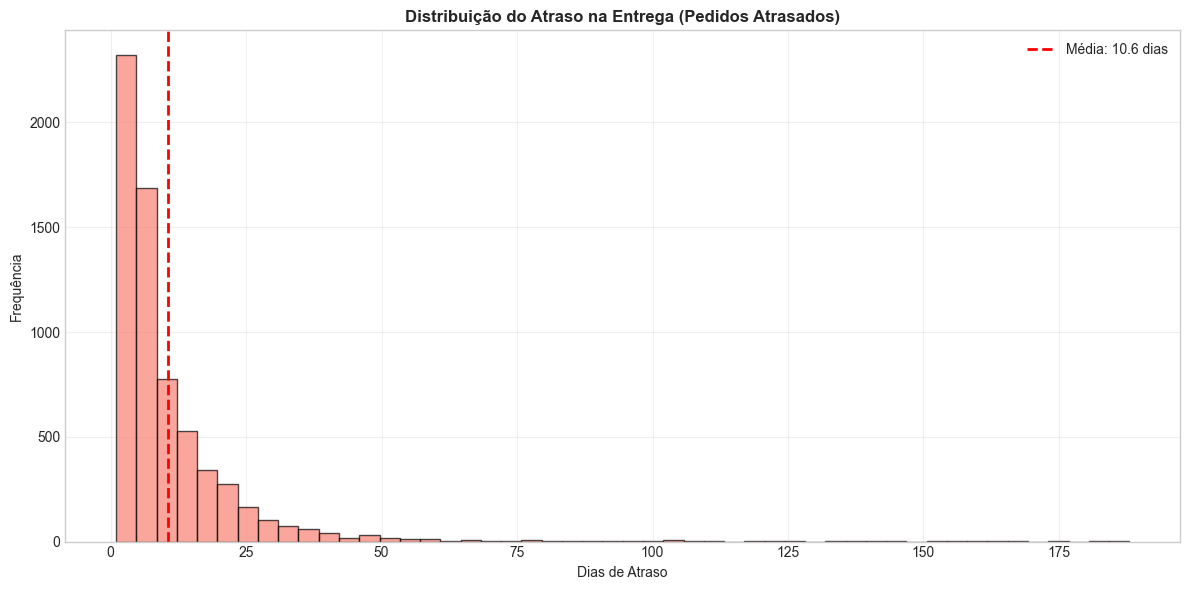

✓ Salvo: eda_10_delivery_delay.png


In [13]:
delivered_orders = df_orders[df_orders['order_status'] == 'delivered'].copy()
late_analysis = delivered_orders['is_late'].value_counts()
late_pct = (late_analysis / late_analysis.sum() * 100)

print(f"\nPedidos no prazo: {late_analysis.get(0, 0):,} ({late_pct.get(0, 0):.2f}%)")
print(f"Pedidos atrasados: {late_analysis.get(1, 0):,} ({late_pct.get(1, 0):.2f}%)")

# Distribuição do atraso
delay_data = delivered_orders[delivered_orders['is_late'] == 1]['delivery_delay_days']
print(f"\nAtraso médio (quando atrasado): {delay_data.mean():.2f} dias")
print(f"Atraso mediano: {delay_data.median():.2f} dias")
print(f"Atraso máximo: {delay_data.max():.2f} dias")

plt.figure(figsize=(12, 6))
plt.hist(delay_data, bins=50, edgecolor='black', alpha=0.7, color='salmon')
plt.axvline(delay_data.mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Média: {delay_data.mean():.1f} dias')
plt.xlabel('Dias de Atraso')
plt.ylabel('Frequência')
plt.title('Distribuição do Atraso na Entrega (Pedidos Atrasados)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('./outputs/02_eda_output/eda_10_delivery_delay.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Salvo: eda_10_delivery_delay.png")

